# Apply rec-nition and attack

In [1]:
#install packages
!pip install pandas
!pip install pyarrow
!pip install torch
!pip install transformers
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import re

# load in parquet file
twitter = pd.read_parquet('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/all_danish_historical_tweets_3_with_keys.parquet', engine='pyarrow')

#clean the data
twitter['cleaned_text'] = twitter['text'].apply(lambda x: re.sub(r'@\w+', '@user', x).strip())



In [3]:
#Check data types
twitter.dtypes

conversation_id                  object
lang                             object
created_at                       object
id                               object
text                             object
author_id                        object
public_metrics.retweet_count      int32
public_metrics.reply_count        int32
public_metrics.like_count         int32
public_metrics.quote_count        int32
referenced_tweets_id             object
referenced_tweets_type           object
in_reply_to_user_id              object
__index_level_0__                 int32
PNR                              object
surveyXact_externke              object
non_unique_twitter_author_id    float64
started_survey                  float64
cleaned_text                     object
dtype: object

In [4]:
twitter

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,referenced_tweets_id,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,cleaned_text
0,709678563000258560,sv,2016-03-15T09:52:09.000Z,709678563000258560,"\""De känner inte till verkligheten här ute\"" h...",4457540967,0,0,3,0,None,None,None,0,2602421662,DQTDC3CE1Z3C,0.0,0.0,"\""De känner inte till verkligheten här ute\"" h..."
1,685487760606625796,sv,2016-01-08T15:46:32.000Z,685487760606625796,Nej till att sälja parkering,4457540967,0,0,1,0,None,None,None,1,2602421662,DQTDC3CE1Z3C,0.0,0.0,Nej till att sälja parkering
2,367217340624019457,en,2013-08-13T17:19:43.000Z,367334662743392257,@DalaiLama ... and of the entire creation.,1665328796,0,0,0,0,367217340624019457,replied_to,20609518,0,2510602911,GSN1RE3W3D9V,0.0,1.0,@user ... and of the entire creation.
3,93802066555842560,en,2011-07-20T21:58:50.000Z,93802066555842560,check out this article! I made $300 today! htt...,61058628,0,0,0,0,None,None,None,0,0409912877,MLCM2877ZCLD,0.0,0.0,check out this article! I made $300 today! htt...
4,93739791996301312,en,2011-07-20T17:51:22.000Z,93739791996301312,Local mam makes thousands/month from Home. vis...,61058628,0,0,0,0,None,None,None,1,0409912877,MLCM2877ZCLD,0.0,0.0,Local mam makes thousands/month from Home. vis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285486,1261288653994819586,en,2020-05-15T13:33:43.000Z,1261288653994819586,RT @ANNAPICCINNI: HAVE your SAY! How the crisi...,23830917,7,0,0,0,1261288170701950976,retweeted,None,48,1006832160,G9PU63XFF25V,0.0,0.0,RT @user: HAVE your SAY! How the crisis will a...
4285487,1256334955044458498,en,2020-05-02T13:50:29.000Z,1256581833766076419,"@ChrisEvans Hey @ChrisEvans, unfortunately peo...",23830917,0,0,0,0,1256334955044458498,replied_to,580097412,49,1006832160,G9PU63XFF25V,0.0,0.0,"@user Hey @user, unfortunately people outside ..."
4285488,1245265953312714752,en,2020-04-01T08:25:13.000Z,1245265953312714752,The newest commentary from our team here at\n#...,23830917,2,0,5,0,None,None,None,50,1006832160,G9PU63XFF25V,0.0,0.0,The newest commentary from our team here at\n#...
4285489,1245062600116899842,en,2020-03-31T18:57:10.000Z,1245062600116899842,RT @Sara_Barragan: The UN calls for the immedi...,23830917,2,0,0,0,1245062381111250945,retweeted,None,51,1006832160,G9PU63XFF25V,0.0,0.0,RT @user: The UN calls for the immediate relea...


- conversation_id: refers to the id of the original post
- lang: language
- created_at: when it was created (YYYY-MM-DDTHH:MM:SS.000Z, ISO8601 format giving: year, month, data at Time: hour:minute:second:milisecond in Coordinated Universal Time (UTC))
- id: same as conversation_id unless it is a replied_to
- text: the post, starts with @ if it is a retweet or reply to
- author_id: a unique id for the user tweeting/posting
- public_metrics.retweet_count: how many retweeted
- public_metrics.reply_count: how many replied
- public_metrics.like_count: how many liked
- public_metrics.quote_count: how many quoted
- referenced_tweets_id: what id this row is a reply or retweet of
- referenced_tweets_type: if it is a post (None), retweeted or replied_to
- in_reply_to_user_id: if it is a replied_to what is the user id of the reciever
- __index_level_0__: ??
- PNR: personnummer (Eentydig identifikation af person), like cpr
- surveyXact_externke: personification ID linked to the e-boks survey
- non_unique_twitter_author_id (made by simon): ?? can take 0 or 1
- started_survey (made by simon): if they started the e-boks survey (doesnt mean finished it) can take 0 or 1

In [5]:
#check langauges 
twitter['lang'].value_counts()[0:10]

# mostly english, danish, undetermined, swedish and norwegian 

lang
en     1875604
da     1315065
und     293511
sv      164194
no      102828
de       84820
es       76568
ru       62478
nl       58366
tl       34096
Name: count, dtype: int64

In [6]:
#filter to only danish 
danish = twitter[twitter['lang'] == 'da']
danish
#1.315.065 tweets

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,referenced_tweets_id,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,cleaned_text
22,688493617502093312,da,2016-01-16T22:50:44.000Z,688493617502093312,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3492067815,8,0,0,0,688127028785094657,retweeted,None,0,1511782984,3XCSPZMVPM9Y,0.0,0.0,RT @user: Angreb i Ouagadougou. Ambassaden føl...
36,259192974976630784,da,2012-10-19T07:23:15.000Z,259192974976630784,se ledige stillinger http://t.co/uHu9ydcX,205170718,0,0,0,0,None,None,None,13,2807531401,TMC3FSZ13CCY,0.0,0.0,se ledige stillinger http://t.co/uHu9ydcX
41,488022378098995200,da,2014-07-12T18:09:36.000Z,488022378098995200,@alicehargest96 \nkan du huske mig fra kandersteg,856190408,0,0,0,0,None,None,2341036221,3,2009980973,FQ4TX1E23YCU,0.0,0.0,@user \nkan du huske mig fra kandersteg
53,1171077405877948416,da,2019-09-09T15:06:25.000Z,1171077405877948416,Vorbasse,1170630359156953090,0,0,0,0,None,None,None,2,None,None,NaN,NaN,Vorbasse
98,656716588528209920,da,2015-10-21T06:25:53.000Z,656718027140919296,@KristianDuch @jyllandsposten ja lige ved og n...,3047200425,0,0,0,0,656716588528209920,replied_to,1911496490,35,0704732791,MV1HVXXWF17V,0.0,0.0,@user @user ja lige ved og næsten.. #MiaSanMia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285434,1375013343027720192,da,2021-03-25T09:15:02.000Z,1375013343027720192,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1348967453867573252,6,0,0,0,1374796226265288706,retweeted,None,0,None,None,NaN,NaN,RT @user: Verden har brug for endnu flere børn...
4285435,1375013201344102401,da,2021-03-25T09:14:28.000Z,1375013201344102401,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1348967453867573252,4,0,0,0,1375005761093390341,retweeted,None,1,None,None,NaN,NaN,RT @user: Science i fritiden: Se 8 seje projek...
4285436,1366700417699229698,da,2021-03-02T10:42:26.000Z,1366700417699229698,RT @VILLUMFONDEN: Er du interesseret i digital...,1348967453867573252,2,0,0,0,1364939051267162112,retweeted,None,2,None,None,NaN,NaN,RT @user: Er du interesseret i digital dannels...
4285437,1364939051267162112,da,2021-03-02T10:39:32.000Z,1366699688410435585,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1348967453867573252,0,0,0,0,1364939051267162112,replied_to,803171312063643648,3,None,None,NaN,NaN,@user @user @user @user Helt enig - teknologie...


In [7]:
#check for duplicate rows

# Identify duplicate rows
duplicates_danish = danish.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter the DataFrame to get only the duplicate rows
duplicate_rows_danish = danish[duplicates_danish]

print("Duplicate rows:")
print(duplicate_rows_danish)

#there are no duplicate rows

Duplicate rows:
Empty DataFrame
Columns: [conversation_id, lang, created_at, id, text, author_id, public_metrics.retweet_count, public_metrics.reply_count, public_metrics.like_count, public_metrics.quote_count, referenced_tweets_id, referenced_tweets_type, in_reply_to_user_id, __index_level_0__, PNR, surveyXact_externke, non_unique_twitter_author_id, started_survey, cleaned_text]
Index: []


## Applying rec-nition 

In [44]:
#rec-nition on full data

#add rec-nition model to ‘text’ column: produces binary class: anderkendende/ikke-anerkendende:
# 0 = ikke-anerkendende 
# 1 = anerkendende

from tqdm import tqdm
import numpy as np
import os
import torch

# Change working directory
os.chdir('/Users/idahelenedencker/Desktop/STANDBY_Ida/Facebook Field Study with Local Politicians/Scripts/Rec-nition')

# Print contents of the working directory
contents = os.listdir(os.getcwd())
print("Contents of the Working Directory:")
for item in contents:
    print(item)

from transformers import AutoTokenizer
from model_def import ElectraClassifier

def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
    model = ElectraClassifier(model_checkpoint, 2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')), strict=False)
    model.eval()
    return model, tokenizer

def make_prediction(text):
    try:
        tokenized_text = tokenizer(
            text,
            truncation=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )
        input_ids = tokenized_text['input_ids']
        attention_masks = tokenized_text['attention_mask']
        logits = model(input_ids, attention_masks)

        logit, preds = torch.max(logits, dim=1)
        return int(preds)
    except Exception as e:
        print(f"Error occurred: {e}")
        return None  # or handle the error as needed

# Load model and tokenizer
model, tokenizer = load_model()

# Make text into list
text = [str(i) for i in danish['cleaned_text'].tolist()]

# Initialize list to store labels
recnit_scores = []

# Iterate over text with tqdm progress bar
for i, single_text in enumerate(tqdm(text, desc="Extracting rec-nition scores")):
    try:
        label = make_prediction(single_text)
        if label is not None:
            recnit_scores.append(label)
        else:
            recnit_scores.append(np.nan)  # or any placeholder for missing data
    except Exception as e:
        print(f"Error occurred on row {i}: {e}")
        recnit_scores.append(np.nan)  # or any placeholder for missing data

# Assign rec-nition scores to dataframe
danish['rec-nition'] = np.array(recnit_scores)

# Save the dataframe that now has rec-nition scores
danish.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_all.csv', index=False)



Contents of the Working Directory:
LICENSE.md
.DS_Store
model_def.py
definitioner.pdf
__pycache__
README.md
data_prep.py
pytorch_model.bin
.ipynb_checkpoints


Extracting rec-nition scores: 100%|█| 1315065/1315065 [25:21:14<00:00, 14.41it/s
/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_3715/214608578.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danish['rec-nition'] = np.array(recnit_scores)


In [8]:
#load in recnition scored csv as the right data types

# Define the dtype dictionary
dtype_dict_all = {
    'conversation_id': 'object',
    'lang': 'object',
    'created_at': 'object',
    'id': 'object',
    'text': 'object',
    'author_id': 'object',
    'referenced_tweets_id': 'object',
    'referenced_tweets_type': 'object',
    'in_reply_to_user_id': 'object',
    'PNR': 'object',
    'surveyXact_externke': 'object',
    'non_unique_twitter_author_id': 'float64',
    'started_survey': 'float64',
    'cleaned_text': 'object'
}

# Define converters for integer columns to handle non-numeric values
converters = {
    'public_metrics.retweet_count': lambda x: pd.to_numeric(x, errors='coerce'),
    'public_metrics.reply_count': lambda x: pd.to_numeric(x, errors='coerce'),
    'public_metrics.like_count': lambda x: pd.to_numeric(x, errors='coerce'),
    'public_metrics.quote_count': lambda x: pd.to_numeric(x, errors='coerce'),
    '__index_level_0__': lambda x: pd.to_numeric(x, errors='coerce'),
    'rec-nition': lambda x: pd.to_numeric(x, errors='coerce')
}

# Read the CSV file
df = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_all.csv', dtype=dtype_dict_all, converters=converters, na_values=['', 'NaN'])

# Count NaNs in each column
nan_count = df.isna().sum()
print(nan_count)


conversation_id                      0
lang                                16
created_at                          62
id                                  62
text                                62
author_id                        51638
public_metrics.retweet_count    117196
public_metrics.reply_count      117218
public_metrics.like_count        51675
public_metrics.quote_count       51638
referenced_tweets_id            419124
referenced_tweets_type          419124
in_reply_to_user_id             706864
__index_level_0__                51641
PNR                             158751
surveyXact_externke             224331
non_unique_twitter_author_id    224331
started_survey                  224331
cleaned_text                    117218
rec-nition                      117218
dtype: int64


In [9]:
df
#the id columns look right

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,referenced_tweets_id,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,cleaned_text,rec-nition
0,688493617502093312,da,2016-01-16T22:50:44.000Z,688493617502093312,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3492067815,8.0,0.0,0.0,0.0,688127028785094657,retweeted,NaN,0.0,1511782984,3XCSPZMVPM9Y,0.0,0.0,RT @user: Angreb i Ouagadougou. Ambassaden føl...,0.0
1,259192974976630784,da,2012-10-19T07:23:15.000Z,259192974976630784,se ledige stillinger http://t.co/uHu9ydcX,205170718,0.0,0.0,0.0,0.0,NaN,NaN,NaN,13.0,2807531401,TMC3FSZ13CCY,0.0,0.0,se ledige stillinger http://t.co/uHu9ydcX,0.0
2,488022378098995200,da,2014-07-12T18:09:36.000Z,488022378098995200,@alicehargest96 \nkan du huske mig fra kandersteg,856190408,0.0,0.0,0.0,0.0,NaN,NaN,2341036221,3.0,2009980973,FQ4TX1E23YCU,0.0,0.0,@user \nkan du huske mig fra kandersteg,0.0
3,1171077405877948416,da,2019-09-09T15:06:25.000Z,1171077405877948416,Vorbasse,1170630359156953090,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Vorbasse,0.0
4,656716588528209920,da,2015-10-21T06:25:53.000Z,656718027140919296,@KristianDuch @jyllandsposten ja lige ved og n...,3047200425,0.0,0.0,0.0,0.0,656716588528209920,replied_to,1911496490,35.0,0704732791,MV1HVXXWF17V,0.0,0.0,@user @user ja lige ved og næsten.. #MiaSanMia,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432232,1375013343027720192,da,2021-03-25T09:15:02.000Z,1375013343027720192,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1348967453867573252,6.0,0.0,0.0,0.0,1374796226265288706,retweeted,NaN,0.0,NaN,NaN,NaN,NaN,RT @user: Verden har brug for endnu flere børn...,0.0
1432233,1375013201344102401,da,2021-03-25T09:14:28.000Z,1375013201344102401,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1348967453867573252,4.0,0.0,0.0,0.0,1375005761093390341,retweeted,NaN,1.0,NaN,NaN,NaN,NaN,RT @user: Science i fritiden: Se 8 seje projek...,0.0
1432234,1366700417699229698,da,2021-03-02T10:42:26.000Z,1366700417699229698,RT @VILLUMFONDEN: Er du interesseret i digital...,1348967453867573252,2.0,0.0,0.0,0.0,1364939051267162112,retweeted,NaN,2.0,NaN,NaN,NaN,NaN,RT @user: Er du interesseret i digital dannels...,0.0
1432235,1364939051267162112,da,2021-03-02T10:39:32.000Z,1366699688410435585,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1348967453867573252,0.0,0.0,0.0,0.0,1364939051267162112,replied_to,803171312063643648,3.0,NaN,NaN,NaN,NaN,@user @user @user @user Helt enig - teknologie...,1.0


In [10]:
#check the types look right 
df.dtypes

conversation_id                  object
lang                             object
created_at                       object
id                               object
text                             object
author_id                        object
public_metrics.retweet_count    float64
public_metrics.reply_count      float64
public_metrics.like_count       float64
public_metrics.quote_count      float64
referenced_tweets_id             object
referenced_tweets_type           object
in_reply_to_user_id              object
__index_level_0__               float64
PNR                              object
surveyXact_externke              object
non_unique_twitter_author_id    float64
started_survey                  float64
cleaned_text                     object
rec-nition                      float64
dtype: object

In [11]:
#check content of different columns 
df['rec-nition'].value_counts(dropna=False)

df['lang'].value_counts(dropna=False) #looks off, check when Na's in rec-nition has been removed

lang
da                    1366595
2713065461              65536
0                          38
NaN                        16
1                           8
2968323627                  5
738685671280381953          3
387884641                   3
860286271                   2
260305705                   2
52181698                    2
119890574                   2
1400329615                  2
1146083174                  2
2292012107                  1
2510124233                  1
383123956                   1
546738902                   1
708909584                   1
17449213                    1
22923390                    1
159209066                   1
94076413                    1
954009500                   1
3002933362                  1
2210950954                  1
6027912                     1
134524318                   1
50604901                    1
490231613                   1
153441186                   1
21282993                    1
24147423                    1
32867

In [12]:
#check recnition worked 
recnition= df[df['rec-nition'] == 1]
text_to_print = recnition['cleaned_text'].sample(20).tolist()
text_to_print

['@user Tillykke 🇩🇰 🌹 🍾',
 '@user @user @user Forvirringen er vel trods alt rimelig nok, al den stund at det første forslag var at flytte dem til en gruppe, de allerede var i. Derudover er jeg enig med din kommentar.',
 'Selv tak @user - super samtale med gode perspektiver. Løser idræt/bevægelse alt? Nej, men meget, specielt når det foregår i fællesskaber. Glæder mig til den videre dialoge for at få flere med 👍🙏 vi har en gruppe af veteranfamilier som har det svært. Her skal vi gøre mere. https://t.co/lojEAW2XcU https://t.co/mcKmnxyCYf',
 'Et af de bedste steder jeg nogensinde har spist so far. Lækkert smag, kreativt sat sammen og super betjening. http://t.co/0gbJW2A6',
 '@user Godt nytår!',
 '@user @user Tillykke med hende',
 '@user lækker og interessant artikel Sanni :)',
 '@user Tak for Jeres deltagelse Mikkel!',
 '@user @user @user Du må efterhånden være hærdet 😄 Men god fornøjelse med det. Jeg glæder mig i hvert fald til at læse det.',
 '@user Hvad mener du med "vi", du landsforræ

In [13]:
#check for duplicate rows

# Identify duplicate rows
duplicates_df = df.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter the DataFrame to get only the duplicate rows
duplicate_rows_df = df[duplicates_df]

print("Duplicate rows:")
print(duplicate_rows_df)

#There are some duplicates row that appreared when applying rec-nition 

Duplicate rows:
                                          conversation_id lang created_at  \
235444  Det er et svært begreb. Artsantal er ikke. Ind...  NaN        NaN   
235446  Det er et svært begreb. Artsantal er ikke. Ind...  NaN        NaN   
356310                                              #fv15    0        NaN   
359765                 Jeg er så glad for det 😘 God aften  NaN        NaN   
359767                 Jeg er så glad for det 😘 God aften  NaN        NaN   
...                                                   ...  ...        ...   
866154                      Antal liderlige sejlere: 1000  NaN        NaN   
866155                            Antal givne fucks: NUL!  NaN        NaN   
866157                      Antal liderlige sejlere: 1000  NaN        NaN   
866158                            Antal givne fucks: NUL!  NaN        NaN   
885948                      #dkpol http://t.co/JyfFLea6nF    0        NaN   

         id text author_id  public_metrics.retweet_count  \

In [14]:
#Clean and check the data

#remove all rows with Na in 'rec-nition'
no_nas_df = df.dropna(subset=['rec-nition'])
no_nas_df #has now 1.315.019 tweets (original has 1.315.065 tweets)

#now again check for duplicate rows
duplicates_no_nas_df = no_nas_df.duplicated(keep=False)  # keep=False marks all duplicates as True
duplicate_rows_no_nas_df = no_nas_df[duplicates_no_nas_df]
print("Duplicate rows:")
print(duplicate_rows_no_nas_df) #there are now no duplicate rows!

# Check the column that looked wierd 
no_nas_df['lang'].value_counts(dropna=False) #it now has only 'da'

# Count NaNs in each column
nan_count = no_nas_df.isna().sum()
print(nan_count) #looks right 



Duplicate rows:
Empty DataFrame
Columns: [conversation_id, lang, created_at, id, text, author_id, public_metrics.retweet_count, public_metrics.reply_count, public_metrics.like_count, public_metrics.quote_count, referenced_tweets_id, referenced_tweets_type, in_reply_to_user_id, __index_level_0__, PNR, surveyXact_externke, non_unique_twitter_author_id, started_survey, cleaned_text, rec-nition]
Index: []
conversation_id                      0
lang                                 0
created_at                           0
id                                   0
text                                 0
author_id                            0
public_metrics.retweet_count         0
public_metrics.reply_count           0
public_metrics.like_count            0
public_metrics.quote_count           0
referenced_tweets_id            367483
referenced_tweets_type          367483
in_reply_to_user_id             655223
__index_level_0__                    0
PNR                             107113
surveyXact

## Applying attack

In [15]:
#attack on rec-nition scored dataframe

#add attack model to ‘text’ column: produces binary class: sprogligt angreb/ikke sprogligt angreb:
# 0 = ikke sprogligt angreb
# 1 = sprogligt angreb

from tqdm import tqdm
import numpy as np
import torch
from transformers import AutoTokenizer

# Change working directory
import os
os.chdir('/Users/idahelenedencker/Desktop/STANDBY_Ida/Facebook Field Study with Local Politicians/Scripts/A-ttack')

# Print contents of the working directory to check 
contents = os.listdir(os.getcwd())
print("Contents of the Working Directory:")
for item in contents:
    print(item)

from model_def import ElectraClassifier

def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
    model = ElectraClassifier(model_checkpoint, 2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')), strict=False)
    model.eval()
    return model, tokenizer

def make_prediction(text):
    try:
        tokenized_text = tokenizer(
            text,
            truncation=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )
        input_ids = tokenized_text['input_ids']
        attention_masks = tokenized_text['attention_mask']
        logits = model(input_ids, attention_masks)

        logit, preds = torch.max(logits, dim=1)
        return int(preds)
    except Exception as e:
        print(f"Error occurred: {e}")
        return None  # or handle the error as needed

# Load model and tokenizer
model, tokenizer = load_model()

# Make text into list
text = [str(i) for i in no_nas_df['cleaned_text'].tolist()]

# Initialize list to store labels
attack_scores = []

# Iterate over text with tqdm progress bar
for i, single_text in enumerate(tqdm(text, desc="Extracting attack scores")):
    try:
        label = make_prediction(single_text)
        if label is not None:
            attack_scores.append(label)
        else:
            attack_scores.append(np.nan)  # or any placeholder for missing data
    except Exception as e:
        print(f"Error occurred on row {i}: {e}")
        attack_scores.append(np.nan)  # or any placeholder for missing data

# Assign attack scores to dataframe
no_nas_df['attack'] = np.array(attack_scores)

# Save the dataframe with rec-nition and attack scores
no_nas_df.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_all.csv', index=False)



Contents of the Working Directory:
LICENSE.md
.DS_Store
requirements.txt
model_def.py
definitioner.pdf
README.md
data_prep.py
pytorch_model.bin


Extracting attack scores: 100%|████| 1315019/1315019 [37:45:13<00:00,  9.68it/s]
/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_21334/1404462059.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nas_df['attack'] = np.array(attack_scores)


In [29]:
#load in the recnition + attack scores csv

# Define the dtype dictionary
dtype_dict_all = {
    'conversation_id': 'object',
    'lang': 'object',
    'created_at': 'object',
    'id': 'object',
    'text': 'object',
    'author_id': 'object',
    'referenced_tweets_id': 'object',
    'referenced_tweets_type': 'object',
    'in_reply_to_user_id': 'object',
    'PNR': 'object',
    'surveyXact_externke': 'object',
    'non_unique_twitter_author_id': 'float64',
    'started_survey': 'float64',
    'cleaned_text': 'object'
}

# Define converters for integer columns to handle non-numeric values
converters = {
    'public_metrics.retweet_count': lambda x: pd.to_numeric(x, errors='coerce'),
    'public_metrics.reply_count': lambda x: pd.to_numeric(x, errors='coerce'),
    'public_metrics.like_count': lambda x: pd.to_numeric(x, errors='coerce'),
    'public_metrics.quote_count': lambda x: pd.to_numeric(x, errors='coerce'),
    '__index_level_0__': lambda x: pd.to_numeric(x, errors='coerce')
}

# Read the CSV file
both = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_all.csv', dtype=dtype_dict_all, converters=converters, na_values=['', 'NaN'])

# Count NaNs in each column
nan_count = both.isna().sum()
print(nan_count)


conversation_id                      0
lang                                 0
created_at                           0
id                                   0
text                                 0
author_id                            0
public_metrics.retweet_count         0
public_metrics.reply_count           0
public_metrics.like_count            0
public_metrics.quote_count           0
referenced_tweets_id            367483
referenced_tweets_type          367483
in_reply_to_user_id             655223
__index_level_0__                    0
PNR                             107113
surveyXact_externke             107113
non_unique_twitter_author_id    107113
started_survey                  107113
cleaned_text                         0
rec-nition                           0
attack                               0
dtype: int64


In [30]:
both

#1315019 rows, the same as the cleaned rec-nition data, so no rows are added

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,...,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,cleaned_text,rec-nition,attack
0,688493617502093312,da,2016-01-16T22:50:44.000Z,688493617502093312,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3492067815,8.0,0.0,0.0,0.0,...,retweeted,NaN,0.0,1511782984,3XCSPZMVPM9Y,0.0,0.0,RT @user: Angreb i Ouagadougou. Ambassaden føl...,0.0,0
1,259192974976630784,da,2012-10-19T07:23:15.000Z,259192974976630784,se ledige stillinger http://t.co/uHu9ydcX,205170718,0.0,0.0,0.0,0.0,...,NaN,NaN,13.0,2807531401,TMC3FSZ13CCY,0.0,0.0,se ledige stillinger http://t.co/uHu9ydcX,0.0,0
2,488022378098995200,da,2014-07-12T18:09:36.000Z,488022378098995200,@alicehargest96 \nkan du huske mig fra kandersteg,856190408,0.0,0.0,0.0,0.0,...,NaN,2341036221,3.0,2009980973,FQ4TX1E23YCU,0.0,0.0,@user \nkan du huske mig fra kandersteg,0.0,0
3,1171077405877948416,da,2019-09-09T15:06:25.000Z,1171077405877948416,Vorbasse,1170630359156953090,0.0,0.0,0.0,0.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Vorbasse,0.0,0
4,656716588528209920,da,2015-10-21T06:25:53.000Z,656718027140919296,@KristianDuch @jyllandsposten ja lige ved og n...,3047200425,0.0,0.0,0.0,0.0,...,replied_to,1911496490,35.0,0704732791,MV1HVXXWF17V,0.0,0.0,@user @user ja lige ved og næsten.. #MiaSanMia,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315014,1375013343027720192,da,2021-03-25T09:15:02.000Z,1375013343027720192,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1348967453867573252,6.0,0.0,0.0,0.0,...,retweeted,NaN,0.0,NaN,NaN,NaN,NaN,RT @user: Verden har brug for endnu flere børn...,0.0,1
1315015,1375013201344102401,da,2021-03-25T09:14:28.000Z,1375013201344102401,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1348967453867573252,4.0,0.0,0.0,0.0,...,retweeted,NaN,1.0,NaN,NaN,NaN,NaN,RT @user: Science i fritiden: Se 8 seje projek...,0.0,0
1315016,1366700417699229698,da,2021-03-02T10:42:26.000Z,1366700417699229698,RT @VILLUMFONDEN: Er du interesseret i digital...,1348967453867573252,2.0,0.0,0.0,0.0,...,retweeted,NaN,2.0,NaN,NaN,NaN,NaN,RT @user: Er du interesseret i digital dannels...,0.0,0
1315017,1364939051267162112,da,2021-03-02T10:39:32.000Z,1366699688410435585,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1348967453867573252,0.0,0.0,0.0,0.0,...,replied_to,803171312063643648,3.0,NaN,NaN,NaN,NaN,@user @user @user @user Helt enig - teknologie...,1.0,0


In [31]:
#check the types look right 
both.dtypes

conversation_id                  object
lang                             object
created_at                       object
id                               object
text                             object
author_id                        object
public_metrics.retweet_count    float64
public_metrics.reply_count      float64
public_metrics.like_count       float64
public_metrics.quote_count      float64
referenced_tweets_id             object
referenced_tweets_type           object
in_reply_to_user_id              object
__index_level_0__               float64
PNR                              object
surveyXact_externke              object
non_unique_twitter_author_id    float64
started_survey                  float64
cleaned_text                     object
rec-nition                      float64
attack                            int64
dtype: object

In [32]:
#convert rec-nition to integer
both['rec-nition'] = both['rec-nition'].astype(int)
both


,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,...,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,cleaned_text,rec-nition,attack
0,688493617502093312,da,2016-01-16T22:50:44.000Z,688493617502093312,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3492067815,8.0,0.0,0.0,0.0,...,retweeted,NaN,0.0,1511782984,3XCSPZMVPM9Y,0.0,0.0,RT @user: Angreb i Ouagadougou. Ambassaden føl...,0,0
1,259192974976630784,da,2012-10-19T07:23:15.000Z,259192974976630784,se ledige stillinger http://t.co/uHu9ydcX,205170718,0.0,0.0,0.0,0.0,...,NaN,NaN,13.0,2807531401,TMC3FSZ13CCY,0.0,0.0,se ledige stillinger http://t.co/uHu9ydcX,0,0
2,488022378098995200,da,2014-07-12T18:09:36.000Z,488022378098995200,@alicehargest96 \nkan du huske mig fra kandersteg,856190408,0.0,0.0,0.0,0.0,...,NaN,2341036221,3.0,2009980973,FQ4TX1E23YCU,0.0,0.0,@user \nkan du huske mig fra kandersteg,0,0
3,1171077405877948416,da,2019-09-09T15:06:25.000Z,1171077405877948416,Vorbasse,1170630359156953090,0.0,0.0,0.0,0.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Vorbasse,0,0
4,656716588528209920,da,2015-10-21T06:25:53.000Z,656718027140919296,@KristianDuch @jyllandsposten ja lige ved og n...,3047200425,0.0,0.0,0.0,0.0,...,replied_to,1911496490,35.0,0704732791,MV1HVXXWF17V,0.0,0.0,@user @user ja lige ved og næsten.. #MiaSanMia,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315014,1375013343027720192,da,2021-03-25T09:15:02.000Z,1375013343027720192,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1348967453867573252,6.0,0.0,0.0,0.0,...,retweeted,NaN,0.0,NaN,NaN,NaN,NaN,RT @user: Verden har brug for endnu flere børn...,0,1
1315015,1375013201344102401,da,2021-03-25T09:14:28.000Z,1375013201344102401,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1348967453867573252,4.0,0.0,0.0,0.0,...,retweeted,NaN,1.0,NaN,NaN,NaN,NaN,RT @user: Science i fritiden: Se 8 seje projek...,0,0
1315016,1366700417699229698,da,2021-03-02T10:42:26.000Z,1366700417699229698,RT @VILLUMFONDEN: Er du interesseret i digital...,1348967453867573252,2.0,0.0,0.0,0.0,...,retweeted,NaN,2.0,NaN,NaN,NaN,NaN,RT @user: Er du interesseret i digital dannels...,0,0
1315017,1364939051267162112,da,2021-03-02T10:39:32.000Z,1366699688410435585,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1348967453867573252,0.0,0.0,0.0,0.0,...,replied_to,803171312063643648,3.0,NaN,NaN,NaN,NaN,@user @user @user @user Helt enig - teknologie...,1,0


In [33]:
#check content of different columns 
both['rec-nition'].value_counts(dropna=False)
both['lang'].value_counts(dropna=False)


lang
da    1315019
Name: count, dtype: int64

In [34]:
#check attack worked 
attack= both[both['attack'] == 1]
text_to_print = attack['cleaned_text'].sample(20).tolist()
text_to_print

['@user @user @user Hvis jeg havde svaret var gymnasiereformen ikke endt sådan - vi gjorde hvad vi kunne.\nSpørg dem som skabte asymetrien - forligskredsen.',
 'RT @user: Regeringen lider af kortsynethed. Drop besparelser på uddannelse og forskning. #dkpol #uddpol @user @user https…',
 '@user WHO cares, han har jo været lort for dem og skifter..',
 '@user har du væet på Jamaica?',
 '@user Helt enig! Hele denne anti-kvinde-LGBT diskriminerende politik der føres i Polen får på ingen måde en opmærksomhed som det kræver for at presse den polske regering.',
 'RT @user: @user Enig. Men det er deres valg. Hvis jeg altid skulle udbasunere hvor forfærdelig andre mennesker er, skulle jeg…',
 '@user @user Hærværk. 🛴',
 '@user En snacky støder, er du sgu! :)',
 'RT @user: Lars Løkke mener regeringen er skyld i vanvidsudtalelser fra salafist. Var d så Venstres skyld i 2007 og 2011? #fv15 http://t…',
 '@user @user Sikke noget fis Dorte. SF har ikke hængt en skid på DF. SF går til valg på en ny reger

In [35]:
#check for duplicate rows

# Identify duplicate rows
duplicates_df = both.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter the DataFrame to get only the duplicate rows
duplicate_rows_df = both[duplicates_df]

print("Duplicate rows:")
print(duplicate_rows_df)

#There are none

Duplicate rows:
Empty DataFrame
Columns: [conversation_id, lang, created_at, id, text, author_id, public_metrics.retweet_count, public_metrics.reply_count, public_metrics.like_count, public_metrics.quote_count, referenced_tweets_id, referenced_tweets_type, in_reply_to_user_id, __index_level_0__, PNR, surveyXact_externke, non_unique_twitter_author_id, started_survey, cleaned_text, rec-nition, attack]
Index: []

[0 rows x 21 columns]


In [36]:
both

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,...,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,cleaned_text,rec-nition,attack
0,688493617502093312,da,2016-01-16T22:50:44.000Z,688493617502093312,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3492067815,8.0,0.0,0.0,0.0,...,retweeted,NaN,0.0,1511782984,3XCSPZMVPM9Y,0.0,0.0,RT @user: Angreb i Ouagadougou. Ambassaden føl...,0,0
1,259192974976630784,da,2012-10-19T07:23:15.000Z,259192974976630784,se ledige stillinger http://t.co/uHu9ydcX,205170718,0.0,0.0,0.0,0.0,...,NaN,NaN,13.0,2807531401,TMC3FSZ13CCY,0.0,0.0,se ledige stillinger http://t.co/uHu9ydcX,0,0
2,488022378098995200,da,2014-07-12T18:09:36.000Z,488022378098995200,@alicehargest96 \nkan du huske mig fra kandersteg,856190408,0.0,0.0,0.0,0.0,...,NaN,2341036221,3.0,2009980973,FQ4TX1E23YCU,0.0,0.0,@user \nkan du huske mig fra kandersteg,0,0
3,1171077405877948416,da,2019-09-09T15:06:25.000Z,1171077405877948416,Vorbasse,1170630359156953090,0.0,0.0,0.0,0.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Vorbasse,0,0
4,656716588528209920,da,2015-10-21T06:25:53.000Z,656718027140919296,@KristianDuch @jyllandsposten ja lige ved og n...,3047200425,0.0,0.0,0.0,0.0,...,replied_to,1911496490,35.0,0704732791,MV1HVXXWF17V,0.0,0.0,@user @user ja lige ved og næsten.. #MiaSanMia,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315014,1375013343027720192,da,2021-03-25T09:15:02.000Z,1375013343027720192,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1348967453867573252,6.0,0.0,0.0,0.0,...,retweeted,NaN,0.0,NaN,NaN,NaN,NaN,RT @user: Verden har brug for endnu flere børn...,0,1
1315015,1375013201344102401,da,2021-03-25T09:14:28.000Z,1375013201344102401,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1348967453867573252,4.0,0.0,0.0,0.0,...,retweeted,NaN,1.0,NaN,NaN,NaN,NaN,RT @user: Science i fritiden: Se 8 seje projek...,0,0
1315016,1366700417699229698,da,2021-03-02T10:42:26.000Z,1366700417699229698,RT @VILLUMFONDEN: Er du interesseret i digital...,1348967453867573252,2.0,0.0,0.0,0.0,...,retweeted,NaN,2.0,NaN,NaN,NaN,NaN,RT @user: Er du interesseret i digital dannels...,0,0
1315017,1364939051267162112,da,2021-03-02T10:39:32.000Z,1366699688410435585,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1348967453867573252,0.0,0.0,0.0,0.0,...,replied_to,803171312063643648,3.0,NaN,NaN,NaN,NaN,@user @user @user @user Helt enig - teknologie...,1,0


In [37]:
#Final df to parquet 
both.to_parquet('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_final.parquet', engine='pyarrow')

#Final df to CSV
both.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_final.csv', index=False )



# Analysing and plotting results

In [38]:
# Load in the scored csv
scored_tweets= pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_final.csv')
scored_tweets

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,...,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,cleaned_text,rec-nition,attack
0,688493617502093312,da,2016-01-16T22:50:44.000Z,688493617502093312,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3492067815,8.0,0.0,0.0,0.0,...,retweeted,NaN,0.0,1.511783e+09,3XCSPZMVPM9Y,0.0,0.0,RT @user: Angreb i Ouagadougou. Ambassaden føl...,0,0
1,259192974976630784,da,2012-10-19T07:23:15.000Z,259192974976630784,se ledige stillinger http://t.co/uHu9ydcX,205170718,0.0,0.0,0.0,0.0,...,NaN,NaN,13.0,2.807531e+09,TMC3FSZ13CCY,0.0,0.0,se ledige stillinger http://t.co/uHu9ydcX,0,0
2,488022378098995200,da,2014-07-12T18:09:36.000Z,488022378098995200,@alicehargest96 \nkan du huske mig fra kandersteg,856190408,0.0,0.0,0.0,0.0,...,NaN,2.341036e+09,3.0,2.009981e+09,FQ4TX1E23YCU,0.0,0.0,@user \nkan du huske mig fra kandersteg,0,0
3,1171077405877948416,da,2019-09-09T15:06:25.000Z,1171077405877948416,Vorbasse,1170630359156953090,0.0,0.0,0.0,0.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Vorbasse,0,0
4,656716588528209920,da,2015-10-21T06:25:53.000Z,656718027140919296,@KristianDuch @jyllandsposten ja lige ved og n...,3047200425,0.0,0.0,0.0,0.0,...,replied_to,1.911496e+09,35.0,7.047328e+08,MV1HVXXWF17V,0.0,0.0,@user @user ja lige ved og næsten.. #MiaSanMia,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315014,1375013343027720192,da,2021-03-25T09:15:02.000Z,1375013343027720192,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1348967453867573252,6.0,0.0,0.0,0.0,...,retweeted,NaN,0.0,NaN,NaN,NaN,NaN,RT @user: Verden har brug for endnu flere børn...,0,1
1315015,1375013201344102401,da,2021-03-25T09:14:28.000Z,1375013201344102401,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1348967453867573252,4.0,0.0,0.0,0.0,...,retweeted,NaN,1.0,NaN,NaN,NaN,NaN,RT @user: Science i fritiden: Se 8 seje projek...,0,0
1315016,1366700417699229698,da,2021-03-02T10:42:26.000Z,1366700417699229698,RT @VILLUMFONDEN: Er du interesseret i digital...,1348967453867573252,2.0,0.0,0.0,0.0,...,retweeted,NaN,2.0,NaN,NaN,NaN,NaN,RT @user: Er du interesseret i digital dannels...,0,0
1315017,1364939051267162112,da,2021-03-02T10:39:32.000Z,1366699688410435585,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1348967453867573252,0.0,0.0,0.0,0.0,...,replied_to,8.031713e+17,3.0,NaN,NaN,NaN,NaN,@user @user @user @user Helt enig - teknologie...,1,0


In [39]:
# Pulling some text examples for both 

attack= scored_tweets[scored_tweets['attack'] == 1]
print(attack['text'][:100])


recnition= scored_tweets[scored_tweets['rec-nition'] == 1]
print(recnition['text'][:100])

9       RT @miffno: – Abbas er ansvarlig for voldsbølg...
25      RT @anno1540: Reminder\n\n#Feminism #Vänsterpa...
52                 @BjorklundVictor Lite socialist i dig?
56      RT @PeterSellei: Ungefär samtidigt som @JanKEl...
75      @PompesSon @jsjostedt En slogan som dog: https...
                              ...                        
2713    @SaraDybris @MarkBuskbjerg @RasmusJarlov @agge...
2714    @SaraDybris @MarkBuskbjerg @RasmusJarlov @agge...
2718    Hverken KU presse eller instituttet kan finde ...
2747    Alverdens sektledere drømmer om at have en føl...
2748    @listighjort @kobbersmed @Ph1lip jeg skylder i...
Name: text, Length: 100, dtype: object
23                 God Jul på er https://t.co/EpqvlZbLF0
24                         @liteknivigt God Jul på dig 🎅
47                                      @Swedex6 Billigt
49                             @manundrarju Vedervärdigt
86                            @N00dn1k0l4j Vedervärdigt!
                             ...      

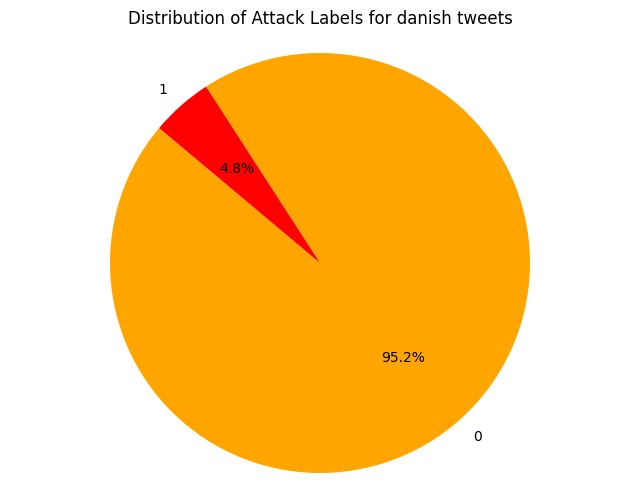

In [40]:
#pie chart of attack label
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = scored_tweets['attack'].value_counts()

# Define a color map for emotion categories
color_map = {
    1: 'red',
    0: 'orange'}

# Plotting the pie chart for all
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts.index])
plt.title('Distribution of Attack Labels for danish tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


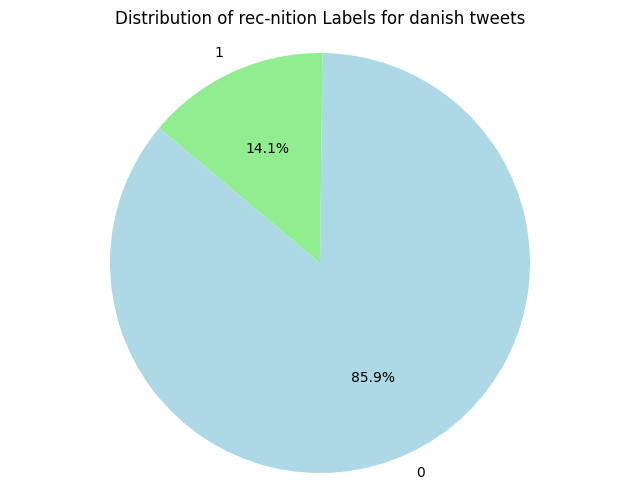

In [41]:
#pie chart of rec-nition label 

label_counts = scored_tweets['rec-nition'].value_counts()

# Define a color map for emotion categories
color_map = {
    1: 'lightgreen',
    0: 'lightblue'}

# Plotting the pie chart for all
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts.index])
plt.title('Distribution of rec-nition Labels for danish tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [42]:
# Count how many post we have for each year:
#make a new column with year based on the first 4 charcahters 
scored_tweets['year'] = scored_tweets['created_at'].str[:4]
#count how many tweets for each year
scored_tweets['year'].value_counts().sort_index()


year
2007        12
2008       308
2009      4660
2010     11295
2011     31510
2012     63228
2013     83449
2014    114649
2015    133266
2016    117387
2017    110210
2018    114788
2019    139447
2020    161949
2021    193559
2022     35302
Name: count, dtype: int64

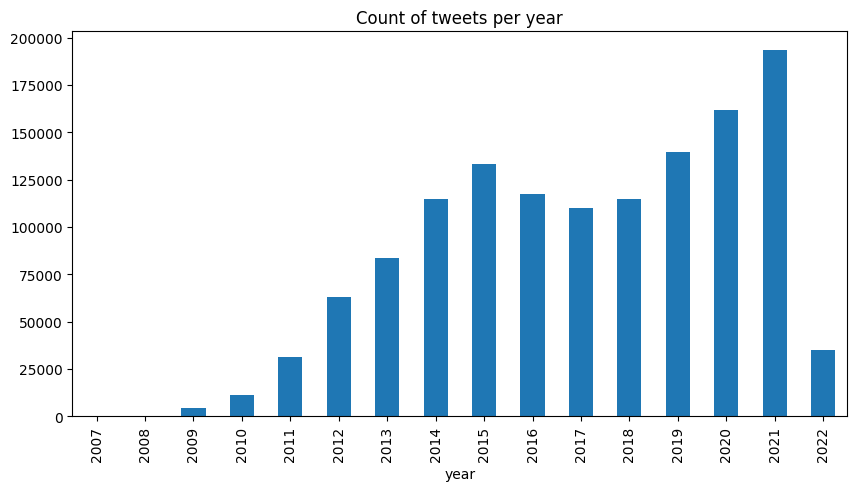

In [43]:
#Make a plot with count of posts on y and the year on x (how many tweets for each year)
ax = scored_tweets['year'].value_counts().sort_index() \
    .plot(kind= 'bar',
    title= 'Count of tweets per year',
    figsize= (10,5))
ax.set_xlabel('year')
plt.show()

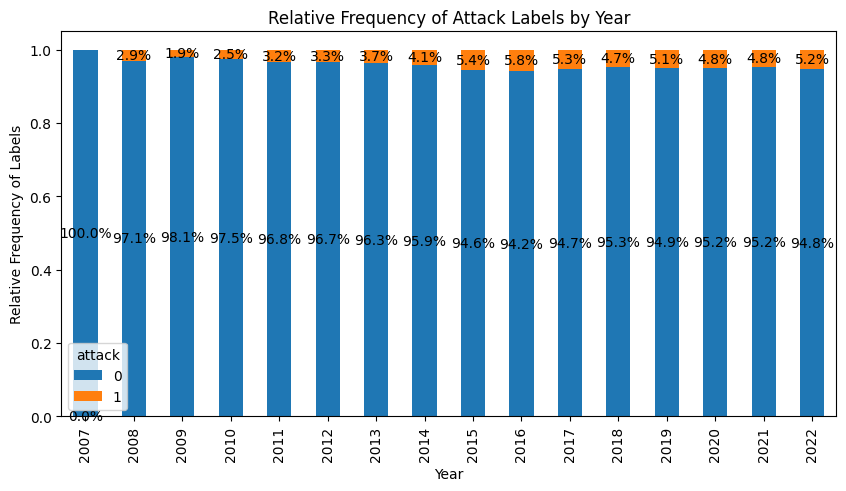

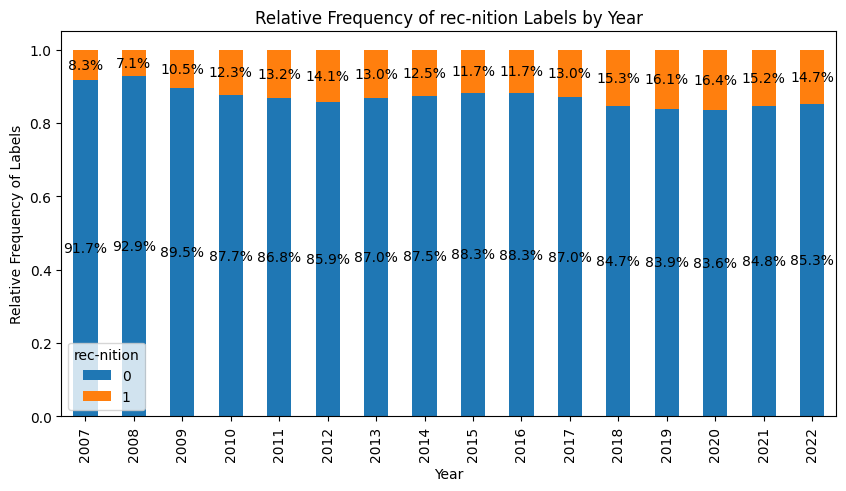

In [44]:
# Plot the distibution of labels over the years

#attack
# Calculate relative frequencies of attack labels (0 and 1) for each year
grouped = scored_tweets.groupby('year')['attack'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 5), title='Relative Frequency of Attack Labels by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Relative Frequency of Labels')

# Annotate the bars with percentages
for container in ax.containers:
    ax.bar_label(container, labels=[f'{h*100:.1f}%' for h in container.datavalues], label_type='center')

plt.show()

#rec-nition
# Calculate relative frequencies of attack labels (0 and 1) for each year
grouped = scored_tweets.groupby('year')['rec-nition'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 5), title='Relative Frequency of rec-nition Labels by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Relative Frequency of Labels')

# Annotate the bars with percentages
for container in ax.containers:
    ax.bar_label(container, labels=[f'{h*100:.1f}%' for h in container.datavalues], label_type='center')

plt.show()